In [ ]:
#!curl https://www.dropbox.com/s/dl/618l4ddoykotmru/Chess%20ID%20Public%20Data.zip
!curl -L -o chess-pieces.zip https://www.dropbox.com/s/618l4ddoykotmru/Chess%20ID%20Public%20Data.zip?dl=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   154    0   154    0     0    751      0 --:--:-- --:--:-- --:--:--   754
100   342  100   342    0     0    711      0 --:--:-- --:--:-- --:--:--     0
100  128M  100  128M    0     0  17.9M      0  0:00:07  0:00:07 --:--:-- 21.8M


In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 13.8 MB/s 
     |████████████████████████████████| 77 kB 5.3 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 840 kB 36.6 MB/s 
     |████████████████████████████████| 1.1 MB 36.7 MB/s 
     |████████████████████████████████| 120 kB 49.9 MB/s 
     |████████████████████████████████| 3.4 MB 40.3 MB/s 
     |████████████████████████████████| 6.4 MB 31.9 MB/s 
     |████████████████████████████████| 596 kB 15.7 MB/s 
     |████████████████████████████████| 1.2 MB 45.8 MB/s 
     |████████████████████████████████| 237 kB 50.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.5 MB/s 
     |████████████████████████████████| 47.8 MB 47 kB/s 
     |████████████████████████████████| 352 kB 41.8 MB/s 
     |████████████████████████████████| 99 kB 8.8 MB/s 
     |████████████████████████████████| 462 kB 46.6 MB/s 
     |███████████████

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d gpiosenka/100-bird-species
!kaggle datasets download -d vvvalter/chess-pieces
#!unzip 100-bird-species.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 1.03G/1.05G [00:05<00:00, 105MB/s] 
100% 1.05G/1.05G [00:05<00:00, 193MB/s]


In [ ]:
import zipfile
#with zipfile.ZipFile('100-bird-species.zip', 'r') as zip_ref:
with zipfile.ZipFile('ChessIDPublicData.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [ ]:
nrows = 4
ncols = 4
#imagenames = os.listdir(os.path.join("train", "ABBOTTS BABBLER"))
imagenames = os.listdir(os.path.join("chess-pieces", "black bishop"))

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

#next_images = [os.path.join(os.path.join("train", "ABBOTTS BABBLER"), fname) for fname in imagenames[:int(ncols*nrows)]]
next_images = [os.path.join(os.path.join("chess-pieces", "black bishop"), fname) for fname in imagenames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
#data = DataLoader.from_folder('train')

data = DataLoader.from_folder(os.path.join("Chess ID Public Data", os.path.join("Chess ID Public Data", "output_train")))
test_data = DataLoader.from_folder(os.path.join("Chess ID Public Data", os.path.join("Chess ID Public Data", "output_test")))
train_data, validation_data = data.split(0.9)

#train_data, rest_data = data.split(0.8)
#validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 10360, num_label: 13, labels: bb, bk, bn, bp, bq, br, empty, wb, wk, wn, wp, wq, wr.


INFO:tensorflow:Load image with size: 10360, num_label: 13, labels: bb, bk, bn, bp, bq, br, empty, wb, wk, wn, wp, wq, wr.


INFO:tensorflow:Load image with size: 185, num_label: 12, labels: bb, bk, bn, bp, bq, br, wb, wk, wn, wp, wq, wr.


INFO:tensorflow:Load image with size: 185, num_label: 12, labels: bb, bk, bn, bp, bq, br, wb, wk, wn, wp, wq, wr.


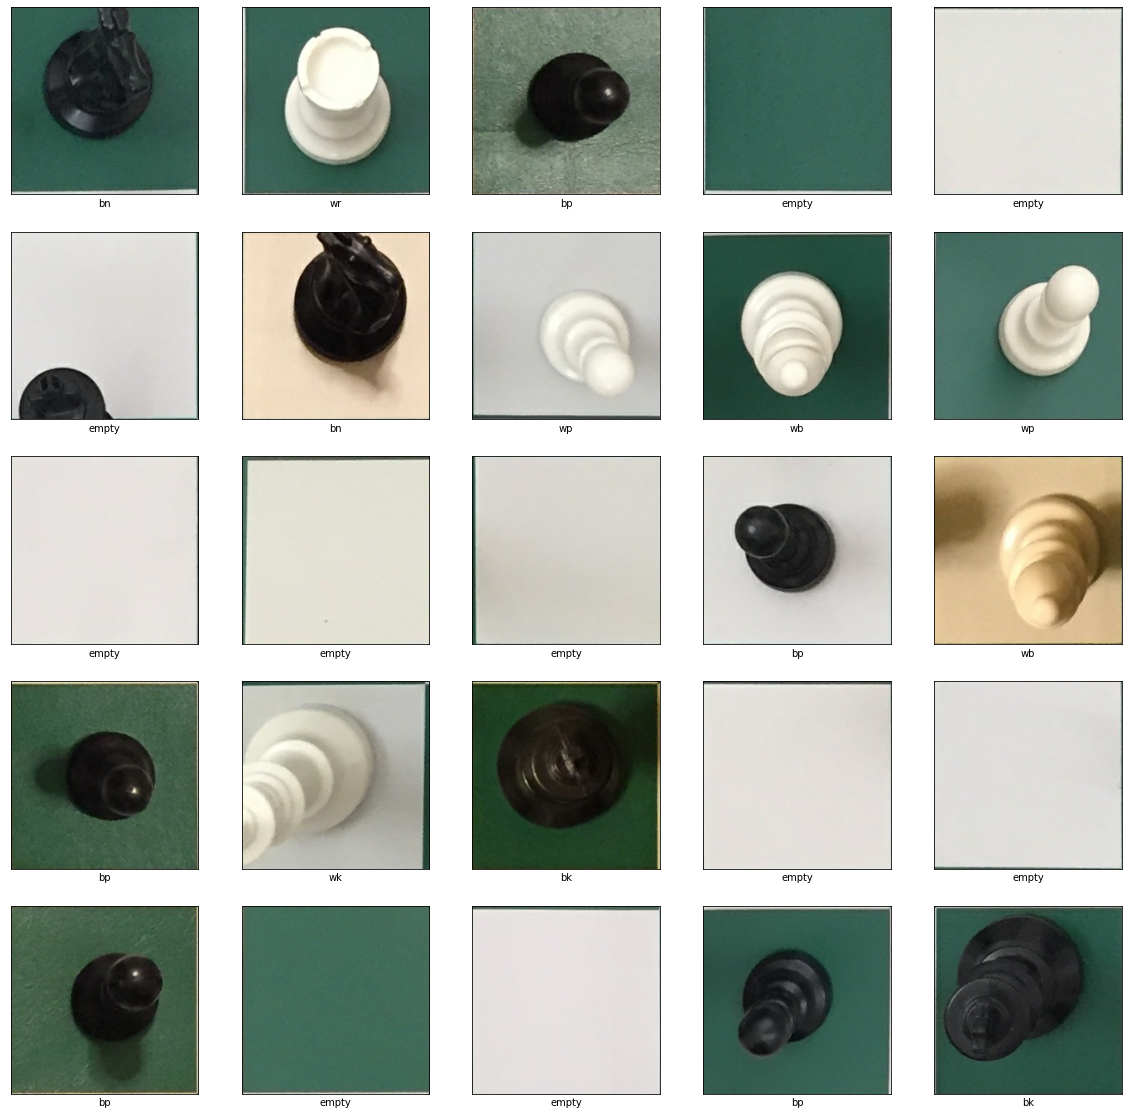

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(train_data.index_to_label[label.numpy()])
plt.show()

In [ ]:
#model = image_classifier.create(train_data, epochs=10)
model = image_classifier.create(train_data, validation_data=validation_data, epochs=20)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_5 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 13)                16653     
                                                                 
Total params: 3,429,677
Trainable params: 16,653
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


291/291 [==============================] - 39s 125ms/step - loss: 0.9317 - accuracy: 0.8716 - val_loss: 0.7013 - val_accuracy: 0.9633
Epoch 2/20
291/291 [==============================] - 36s 122ms/step - loss: 0.7085 - accuracy: 0.9640 - val_loss: 0.6615 - val_accuracy: 0.9788
Epoch 3/20
291/291 [==============================] - 40s 136ms/step - loss: 0.6800 - accuracy: 0.9762 - val_loss: 0.6439 - val_accuracy: 0.9875
Epoch 4/20
291/291 [==============================] - 35s 122ms/step - loss: 0.6637 - accuracy: 0.9799 - val_loss: 0.6344 - val_accuracy: 0.9865
Epoch 5/20
291/291 [==============================] - 35s 120ms/step - loss: 0.6532 - accuracy: 0.9849 - val_loss: 0.6283 - val_accuracy: 0.9894
Epoch 6/20
291/291 [==============================] - 39s 133ms/step - loss: 0.6472 - accuracy: 0.9853 - val_loss: 0.6212 - val_accuracy: 0.9903
Epoch 7/20
291/291 [==============================] - 38s 131ms/step - loss: 0.6422 - accuracy: 0.9859 - val_loss: 0.6172 - val_accuracy: 0.9

In [ ]:
loss, accuracy = model.evaluate(test_data)

6/6 [==============================] - 1s 103ms/step - loss: 2.8460 - accuracy: 0.4811


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 12)                15372     
                                                                 
Total params: 3,428,396
Trainable params: 15,372
Non-trainable params: 3,413,024
_________________________________________________________________


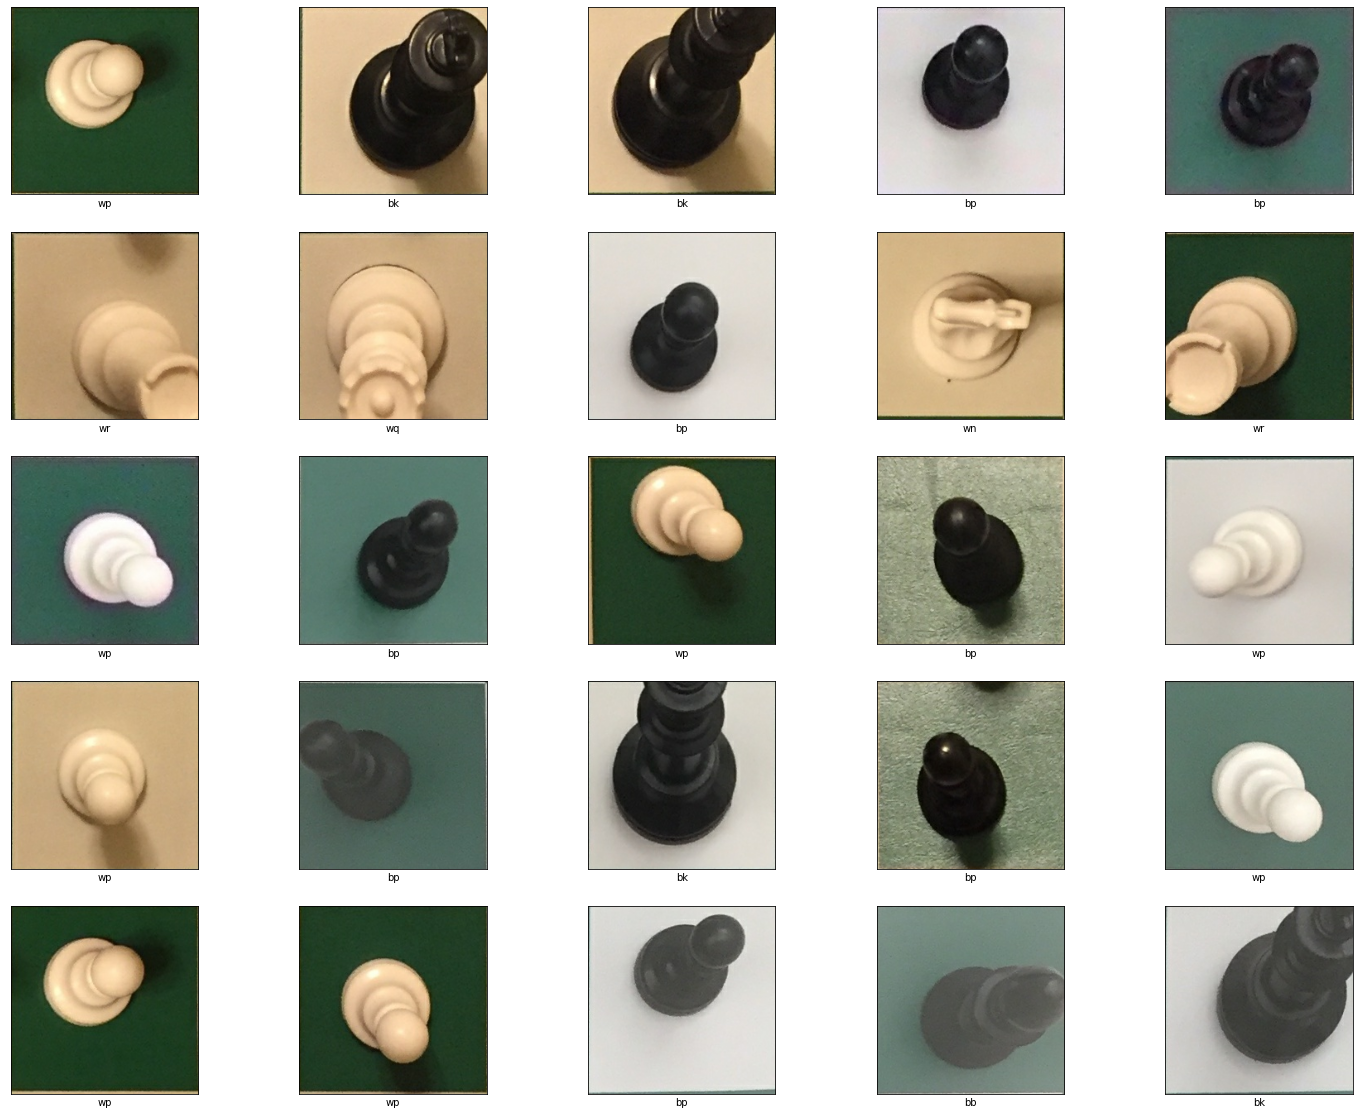

In [ ]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(25, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel(predict_label)
plt.show()

In [ ]:
model.export(export_dir='.', tflite_filename='chess-pieces.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpgt5watc0/assets


INFO:tensorflow:Assets written to: /tmp/tmpgt5watc0/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmprgnk0n60/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmprgnk0n60/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./chess-pieces.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./chess-pieces.tflite
